In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("transfers.csv", sep=';')

In [5]:
print(df.head(5))

   id  player_id        player_name  season        date  from_club_id  \
0   1          1  Jermaine Beckford    2017  2017-07-01           391   
1   2          1  Jermaine Beckford    2015  2015-07-01           289   
2   3          1  Jermaine Beckford    2014  2015-06-30           391   
3   4          1  Jermaine Beckford    2014  2014-11-20           289   
4   5          1  Jermaine Beckford    2013  2013-07-17           271   

  from_club_name  to_club_id to_club_name  market_value  fee from_coach_name  \
0     Preston NE         392         Bury      500000.0  0.0             NaN   
1         Bolton         391   Preston NE      750000.0  0.0             NaN   
2     Preston NE         289       Bolton      750000.0  NaN             NaN   
3         Bolton         391   Preston NE     1200000.0  NaN     Neil Lennon   
4      Leicester         289       Bolton     1500000.0  NaN   Nigel Pearson   

     to_coach_name from_sport_dir_name to_sport_dir_name contract_was_till  \
0 

In [6]:
values = df[['date','fee']].copy()

In [7]:
print(values.head(15))

          date        fee
0   2017-07-01        0.0
1   2015-07-01        0.0
2   2015-06-30        NaN
3   2014-11-20        NaN
4   2013-07-17        NaN
5   2013-06-30        NaN
6   2012-09-29        NaN
7   2011-08-31  3400000.0
8   2010-07-01        0.0
9   2007-06-30        NaN
10  2007-01-01        NaN
11  2006-11-01        NaN
12  2006-10-01        NaN
13  2006-03-01        0.0
14  2003-07-01        NaN


In [8]:
values = values[values['date'].notna()]
values = values[values['fee'].notna()]

In [9]:
a = values.sort_values(by=['date'])
print(a['date'].head(1))

105225    1984-07-01
Name: date, dtype: object


In [10]:
b = values.sort_values(by=['date'], ascending=False)
print(b['date'].head(1))

25308    2020-07-01
Name: date, dtype: object


In [11]:
values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42764 entries, 0 to 111601
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    42764 non-null  object 
 1   fee     42764 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1002.3+ KB


In [12]:
print(values.head(5))

          date        fee
0   2017-07-01        0.0
1   2015-07-01        0.0
7   2011-08-31  3400000.0
8   2010-07-01        0.0
13  2006-03-01        0.0


In [13]:
#80s
first = values[(values['date'] < '1990-01-01') & (values['fee'] >0.0)]

In [14]:
#90s
second = values[(values['date'] < '2000-01-01') & (values['date'] >= '1990-01-01')& (values['fee'] >0.0)]

In [15]:
#00s
third = values[(values['date'] >= '2000-01-01') & (values['date'] < '2010-01-01') & (values['fee'] >0.0)]

In [16]:
#10s
fourth = values[(values['date'] >= '2010-01-01') & (values['fee'] >0.0)]

In [17]:
print(first.head())

              date        fee
98719   1989-12-01   180000.0
109047  1989-09-01  1500000.0
109780  1989-03-01    75000.0


In [18]:
a = first['fee'].sum()
b = second['fee'].sum()
c = third['fee'].sum()
d = fourth['fee'].sum()

In [19]:
my_list = [a,b,c,d]

In [20]:
print(my_list)

[1755000.0, 2414805999.0, 19589800132.0, 40225647410.0]


C:\Users\Dimitris Theo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


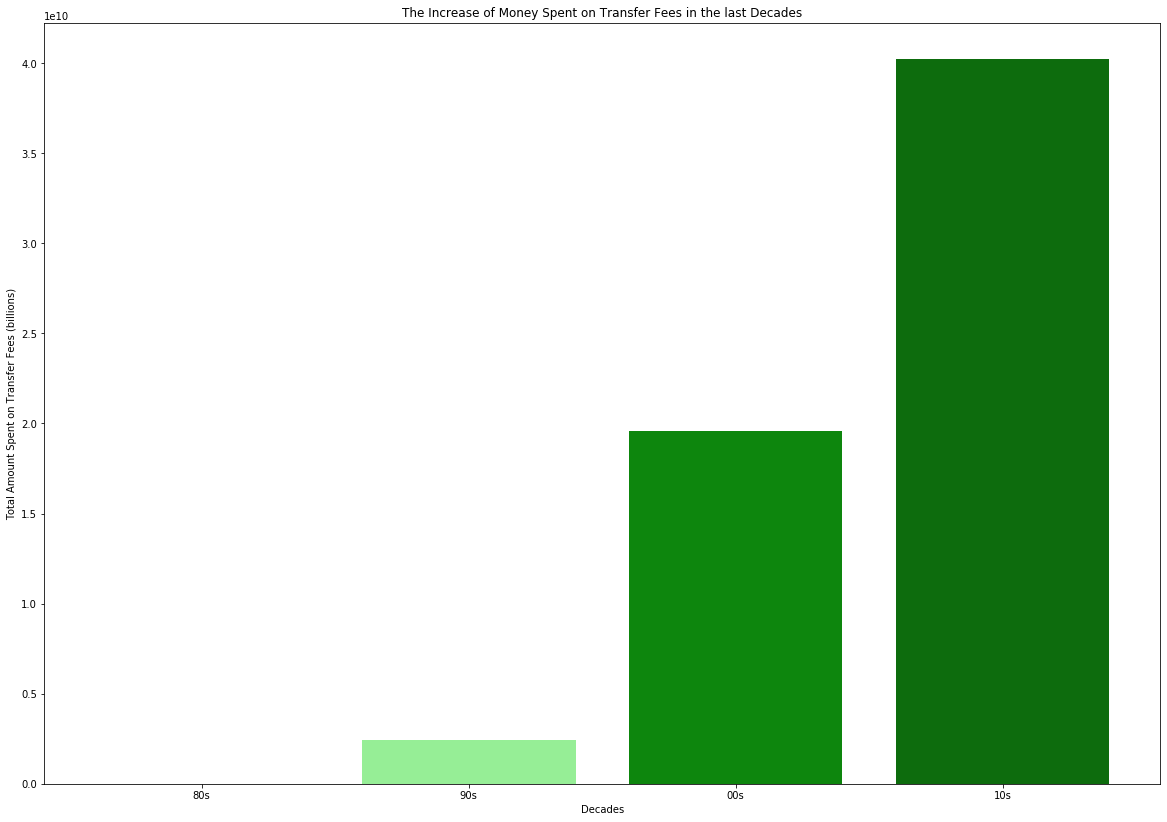

In [21]:
#MATPLOTLIB
plt.figure(figsize = (20,14))
plt.bar(range(len(my_list)), my_list, color=['darkgreen', 'lightgreen', 'green', 'darkgreen'],alpha = 0.95)
plt.xlabel('Decades')
plt.ylabel('Total Amount Spent on Transfer Fees (billions)')
plt.title('The Increase of Money Spent on Transfer Fees in the last Decades')
ax = plt.subplot()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['80s', '90s','00s', '10s'])

plt.show()

In [69]:
#----------------------------------------------------------------------------------------------------------------

In [70]:
values['years'] = values['date'].str.split('-',expand=True)[0]
fees = values[['years','fee']].copy()
print(fees)

       years        fee
0       2017        0.0
1       2015        0.0
7       2011  3400000.0
8       2010        0.0
13      2006        0.0
...      ...        ...
111594  2001        0.0
111595  2000   800000.0
111596  1997  1100000.0
111597  1994   100000.0
111601  2016        0.0

[42764 rows x 2 columns]


In [71]:
each_year = fees.groupby([fees['years']]).sum().reset_index()
each_year['years'] = each_year['years'][0:-2]

In [72]:
print(each_year["years"].head(35))

0     1984
1     1986
2     1987
3     1988
4     1989
5     1990
6     1991
7     1992
8     1993
9     1994
10    1995
11    1996
12    1997
13    1998
14    1999
15    2000
16    2001
17    2002
18    2003
19    2004
20    2005
21    2006
22    2007
23    2008
24    2009
25    2010
26    2011
27    2012
28    2013
29    2014
30    2015
31    2016
32    2017
33    2018
34     NaN
Name: years, dtype: object


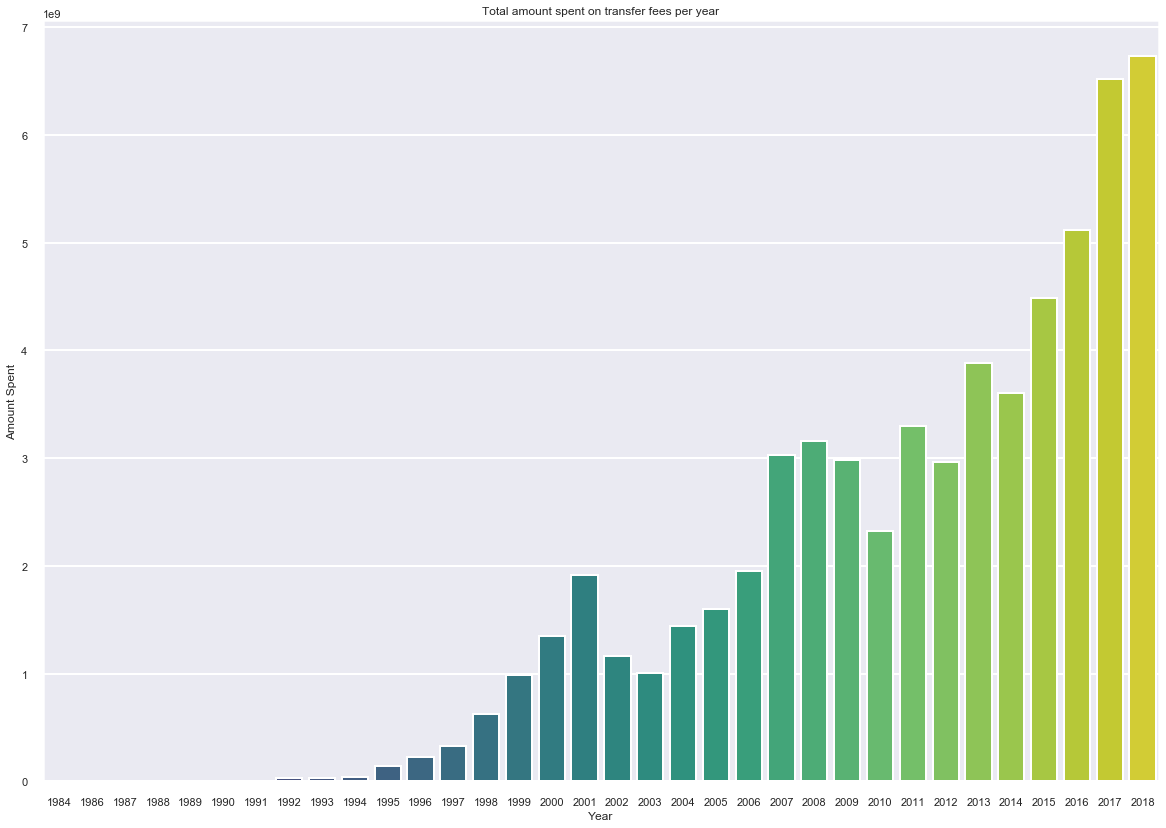

In [73]:
#SEABORN
sns.set_style('darkgrid')
sns.set_context("poster",font_scale=0.5)
f, ax = plt.subplots(figsize = (20,14))
x = each_year["years"]
y = each_year["fee"]
ax.set_title('Total amount spent on transfer fees per year')
ax = sns.barplot(x, y, palette="viridis")
ax.set(xlabel='Year', ylabel='Amount Spent')
plt.show()

In [74]:
#-----------------------------------------------------------------------------------------------------

In [75]:
each_year2 = fees.groupby([fees['years']]).count().reset_index()
print(each_year2)

   years   fee
0   1984     2
1   1986     2
2   1987     6
3   1988    12
4   1989    11
5   1990    28
6   1991    43
7   1992    66
8   1993    77
9   1994   119
10  1995   189
11  1996   264
12  1997   336
13  1998   473
14  1999   538
15  2000   665
16  2001   782
17  2002   810
18  2003   993
19  2004  1402
20  2005  1735
21  2006  2008
22  2007  2270
23  2008  2345
24  2009  2209
25  2010  2512
26  2011  2790
27  2012  2749
28  2013  2759
29  2014  2777
30  2015  2906
31  2016  2861
32  2017  2859
33  2018  2580
34  2019   585
35  2020     1


In [76]:
each_year2['years'] = each_year2['years'][0:-2]

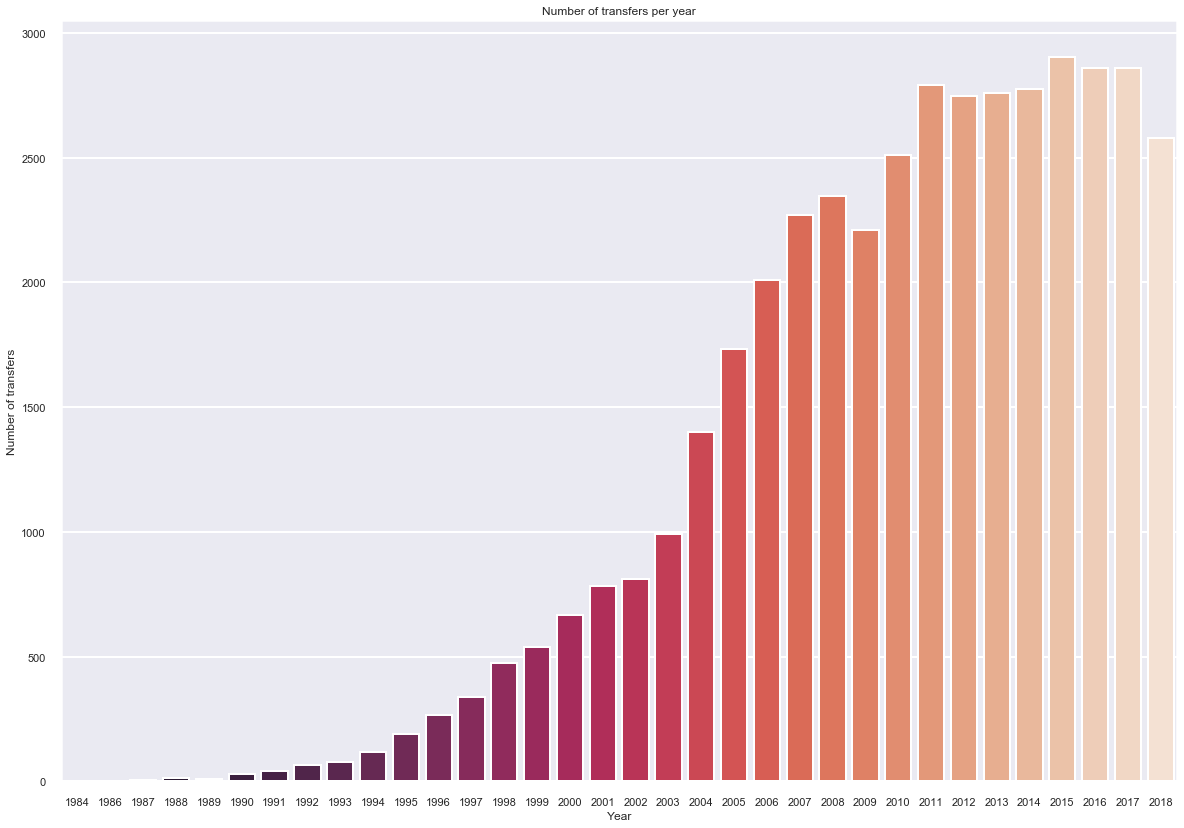

In [47]:
sns.set_style('darkgrid')
sns.set_context("poster",font_scale=0.5)
f, ax = plt.subplots(figsize = (20,14))
x = each_year2["years"]
y = each_year2["fee"]
ax.set_title('Number of transfers per year')
ax = sns.barplot(x, y,palette="rocket")
ax.set(xlabel='Year', ylabel='Number of transfers')
plt.show()